<a href="https://colab.research.google.com/github/NguyenHoang127/AI_Exercise_All/blob/main/Project_AI_5_Predict_Hand_FingerPrint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive 
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [10]:
#Khai báo thư viện

#1.Thư viện tính toán và hiển thị 
import matplotlib.pyplot as plt
import numpy as np

#2.Thư viện xử lý hình 3 chiều thành dữ liệu dưới dạng số
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
from keras.utils import to_categorical

In [11]:
folder = '/content/gdrive/MyDrive/AI_Data_Homework_1/Project_5_FingerPrint'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0

  if file.startswith('UL '):
    output = 1
  if file.startswith('RL '):
    output = 2
  if file.startswith('Ar '):
    output = 3
  if file.startswith('WD '):
    output = 4
  if file.startswith('WE '):
    output = 5
  if file.startswith('WS'):
    output = 6

  photo = load_img(folder + '/' + file, target_size= (160,160))
  photo= img_to_array(photo)

  photos.append(photo)
  labels.append(output)

photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)

save('/content/gdrive/MyDrive/AI_Digital_Data/Project_5_FingerPrint/finger_photos.npy', photos)
save('/content/gdrive/MyDrive/AI_Digital_Data/Project_5_FingerPrint/finger_labels.npy', labels)

(490, 160, 160, 3) (490,)


In [12]:
# Khởi tạo và sử dụng dữ liệu đã tạo
photos = np.load('/content/gdrive/MyDrive/AI_Digital_Data/Project_5_FingerPrint/finger_photos.npy')
labels = np.load('/content/gdrive/MyDrive/AI_Digital_Data/Project_5_FingerPrint/finger_labels.npy')

# Preprocess data
photos = photos.astype('float32') / 255.0
labels = to_categorical(labels)

# Chia ra thành 2 phần để test và train

test_x, test_y = photos[:8], labels[:8]
train_x, train_y = photos[8:], labels[8:]

In [13]:
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization
from keras.layers.activation import LeakyReLU
from keras.optimizers import Adam
from keras import losses
from keras.losses import categorical_crossentropy

In [14]:
# Tạo ra mô hình mạng CNN để train

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 158, 158, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 79, 79, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 77, 77, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 38, 38, 64)        36928     
                                                                 
 conv2d_9 (Conv2D)           (None, 38, 38, 64)       

In [15]:
#Biên dịch chương trình
from keras.backend import categorical_crossentropy
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Augment data with ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
datagen.fit(train_x)

# Train model
history = model.fit(datagen.flow(train_x, train_y, batch_size=128), epochs=150, validation_data=(test_x, test_y))

# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)

Epoch 1/150
4/4 [==============================] - 7s 947ms/step - loss: 1.9207 - accuracy: 0.1432 - val_loss: 1.8462 - val_accuracy: 0.5000
Epoch 2/150
4/4 [==============================] - 4s 1s/step - loss: 1.8408 - accuracy: 0.1577 - val_loss: 1.7801 - val_accuracy: 0.2500
Epoch 3/150
4/4 [==============================] - 3s 633ms/step - loss: 1.8095 - accuracy: 0.1577 - val_loss: 1.7696 - val_accuracy: 0.7500
Epoch 4/150
4/4 [==============================] - 3s 668ms/step - loss: 1.7984 - accuracy: 0.1701 - val_loss: 1.7733 - val_accuracy: 0.0000e+00
Epoch 5/150
4/4 [==============================] - 3s 907ms/step - loss: 1.7990 - accuracy: 0.1577 - val_loss: 1.7637 - val_accuracy: 0.0000e+00
Epoch 6/150
4/4 [==============================] - 4s 772ms/step - loss: 1.7880 - accuracy: 0.1929 - val_loss: 1.7784 - val_accuracy: 0.3750
Epoch 7/150
4/4 [==============================] - 3s 649ms/step - loss: 1.7753 - accuracy: 0.2199 - val_loss: 1.6790 - val_accuracy: 0.5000
Epoch 8/

Test loss: 0.02156706340610981
Test accunacy 1.0


Text(0.5, 1.0, 'Training & Testing Accuracy')

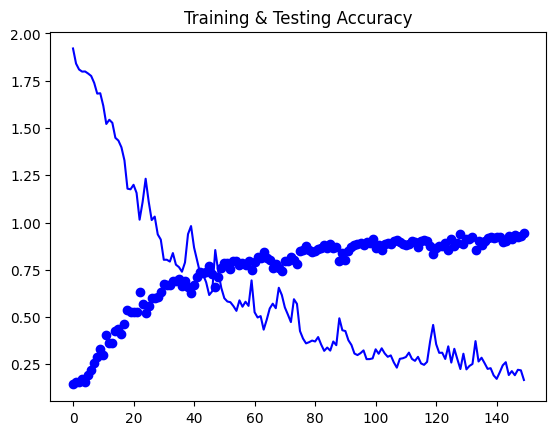

In [19]:
import matplotlib.pyplot as plt
eval = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', eval[0])
print('Test accunacy', eval[1])
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,'bo', label = 'Traning Accuracy')
plt.plot(epochs, loss, 'b', label= 'Test Accuracy')
plt.title('Training & Testing Accuracy')

In [20]:
model.save('/content/gdrive/MyDrive/AI_Result_Homework_1/P5_FingerPrint/Finger.h5')

1/1 [==============================] - 0s 19ms/step

              Bạn thuộc chủng Ulnar Loop: 
                 + Bạn sở hữu tính cách nhẹ nhàng nhưng cũng cởi mở. 
                 + Bạn thích sự lãng mạn, tự do và luôn biết cách hòa hoãn để tránh xảy ra các mâu thuẫn không đáng có. 
                 + Đặc biệt bạn biết lắng nghe và luôn đón nhận những ý kiến từ mọi người để hoàn thiện bản thân
              


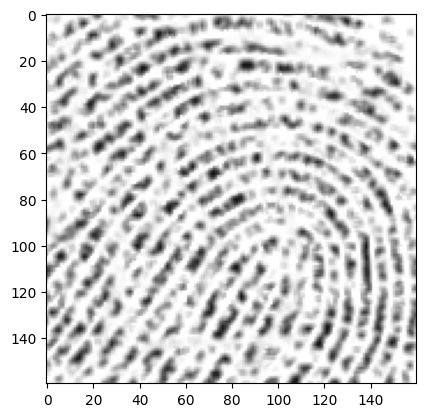

1/1 [==============================] - 0s 19ms/step

              Bạn thuộc chủng Whorl S: 
                + Sống bằng lý trí, luôn kiên định như sức mạnh đại bàng. 
                + Bạn có tinh thần sẵn sàng chiến đấu với mọi kẻ thù và dám đương đầu với mọi thử thách. 
                + Trong công việc họ để cao sự nghiêm túc, không chịu khuất phục và thất bại quá dễ dàng. 
                + Bạn hiếu chiến nên luôn muốn dùng mọi cách để giành chiến thắng, đạt mục tiêu và sự thành công cho bản thân.

              


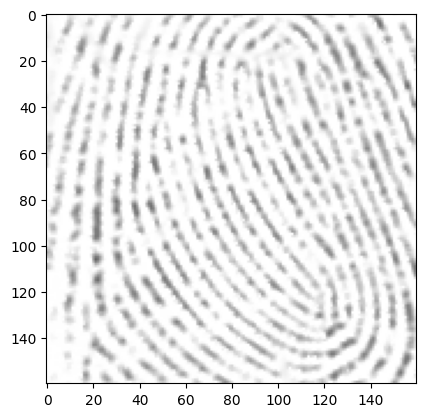

1/1 [==============================] - 0s 19ms/step

              Bạn thuộc chủng Ulnar Loop: 
                 + Bạn sở hữu tính cách nhẹ nhàng nhưng cũng cởi mở. 
                 + Bạn thích sự lãng mạn, tự do và luôn biết cách hòa hoãn để tránh xảy ra các mâu thuẫn không đáng có. 
                 + Đặc biệt bạn biết lắng nghe và luôn đón nhận những ý kiến từ mọi người để hoàn thiện bản thân
              


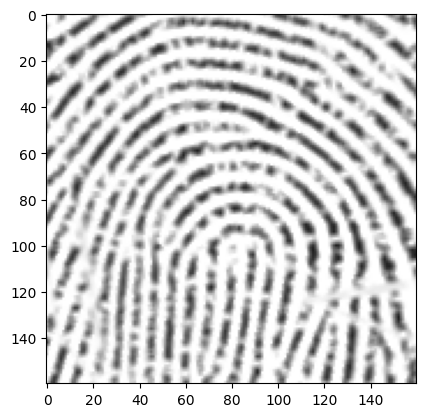

1/1 [==============================] - 0s 39ms/step

              Bạn thuộc chủng Whorl S: 
                + Sống bằng lý trí, luôn kiên định như sức mạnh đại bàng. 
                + Bạn có tinh thần sẵn sàng chiến đấu với mọi kẻ thù và dám đương đầu với mọi thử thách. 
                + Trong công việc họ để cao sự nghiêm túc, không chịu khuất phục và thất bại quá dễ dàng. 
                + Bạn hiếu chiến nên luôn muốn dùng mọi cách để giành chiến thắng, đạt mục tiêu và sự thành công cho bản thân.

              


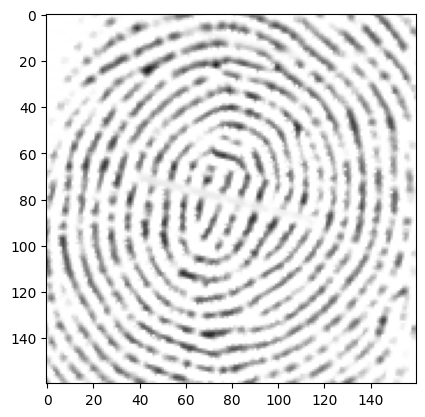

1/1 [==============================] - 0s 32ms/step

              Bạn thuộc chủng Ulnar Loop: 
                 + Bạn sở hữu tính cách nhẹ nhàng nhưng cũng cởi mở. 
                 + Bạn thích sự lãng mạn, tự do và luôn biết cách hòa hoãn để tránh xảy ra các mâu thuẫn không đáng có. 
                 + Đặc biệt bạn biết lắng nghe và luôn đón nhận những ý kiến từ mọi người để hoàn thiện bản thân
              


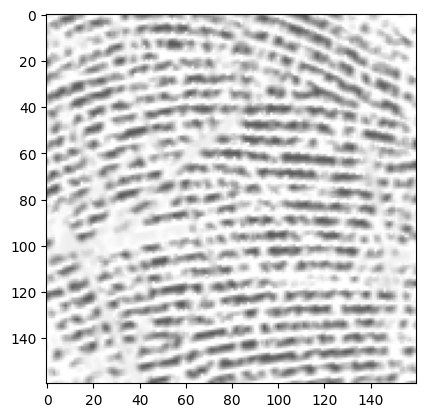

1/1 [==============================] - 0s 27ms/step

              Bạn thuộc chủng Arch: 
                + Bạn là những người có trách nhiệm với công việc, luôn tuân thủ và làm đúng những quy định, phép tắc được đặt ra.
                + Bạn có sự quyết tâm và luôn kiên trì theo đuổi những mục tiêu mà bản thân đã đặt ra. 
                + Bạn luôn chân thành với bạn bè và mọi người nên nhận lại được sự quý mến và tôn trọng từ mọi người. 
                + Bạn không thích những thứ mơ hồ hay tư duy trừu tượng. 
                + Đặc biệt bạn sống thực thế và luôn đòi hỏi mọi thứ, mọi việc có bằng chứng rõ ràng. 
                + Bạn là người kín đáo nên biết cách giữ bí mật, một người đáng tin cậy để mọi người xung quanh chia sẻ những điều thầm kín. 
                + Bạn có ý kiến kiên định và thích làm việc theo những cách thức đơn giản nhất. 
                + Bạn sống khá đơn giản, nhưng vẫn luôn tinh tế. 

              


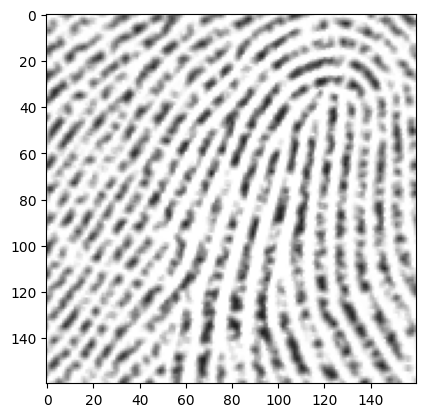

1/1 [==============================] - 0s 27ms/step

              Bạn thuộc chủng Whorl E: 
                + Bạn là người quyết đoán trong công việc, quyết định của bản thân 
                không bị ảnh hưởng nhiều bởi các yếu tố bên ngoài. 
                + Bạn có ý chí kiên cường và khi đã xác định mục tiêu luôn quyết tâm cao độ để hoàn thành nó. 
                + Trong công việc, họ là những người thích hoạch định kế hoạch, chiến lược rõ ràng và khoa học 
                để giúp mọi việc diễn ra đúng mong muốn.
              


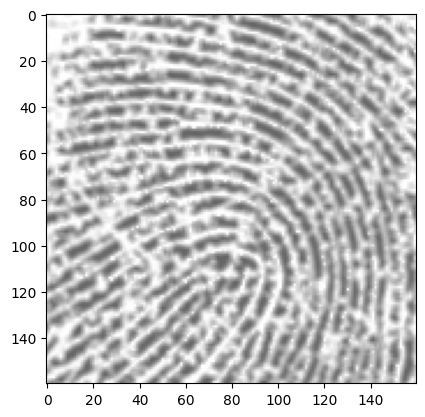

1/1 [==============================] - 0s 30ms/step

              Bạn thuộc chủng Whorl D: 
                + Bạn là những người thân thiện, sống tình cảm và luôn thích tâm sự, chia sẻ với mọi người. 
                + Bạn cũng thích được mọi người yêu thương và trân trọng mình. 
                + Bạn sẵn sàng thay đổi để thích nghi với môi trường mới, 
                trong công việc họ luôn tôn trọng ý kiến của người khác đề ra. 
                + Bạn cũng là những người có khả năng giao tiếp tốt, giỏi thương lượng 
                và sử dụng ngôn từ khéo léo nhằm giải quyết vấn đề nhanh chóng, hiệu quả.

              


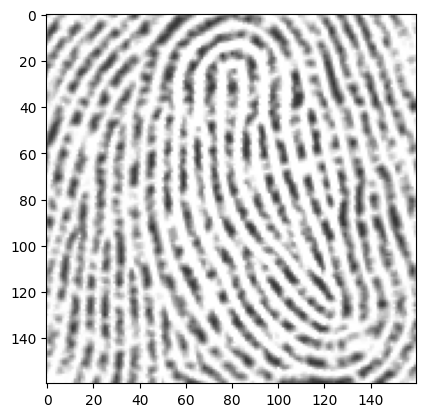

1/1 [==============================] - 0s 27ms/step

              Bạn thuộc chủng Radial Loop: 
                + Bạn có khả năng học hỏi, quan sát và thích nghi nhanh chóng. 
                + Bạn có khả năng sáng tạo cao, kết hợp với tính cách mạnh mẽ cá tính của bản thân 
                khiến công việc của bạn luôn đạt kết quả tốt. 
                + Đôi khi cách quản lý khác biệt của bạn khiến mọi người nhìn vào đánh giá bạn khá lập dị, nổi loạn. 
                + Bạn có thể khiến người khác “ngã ngửa” trong phát ngôn của bản thân. 
                + Vì quyền lợi của bản thân mà họ sẵn sàng đấu tranh, dám nghĩ và dám hành động. 
                + Bạn cực kỳ hứng thú với những điều huyền bí và thích khám phá mọi thứ xung quanh, những thứ mà bạn chưa biết
              


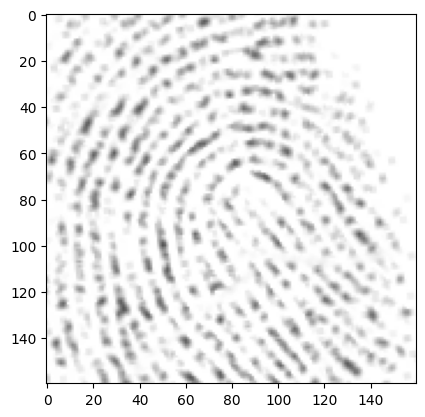

1/1 [==============================] - 0s 31ms/step

              Bạn thuộc chủng Arch: 
                + Bạn là những người có trách nhiệm với công việc, luôn tuân thủ và làm đúng những quy định, phép tắc được đặt ra.
                + Bạn có sự quyết tâm và luôn kiên trì theo đuổi những mục tiêu mà bản thân đã đặt ra. 
                + Bạn luôn chân thành với bạn bè và mọi người nên nhận lại được sự quý mến và tôn trọng từ mọi người. 
                + Bạn không thích những thứ mơ hồ hay tư duy trừu tượng. 
                + Đặc biệt bạn sống thực thế và luôn đòi hỏi mọi thứ, mọi việc có bằng chứng rõ ràng. 
                + Bạn là người kín đáo nên biết cách giữ bí mật, một người đáng tin cậy để mọi người xung quanh chia sẻ những điều thầm kín. 
                + Bạn có ý kiến kiên định và thích làm việc theo những cách thức đơn giản nhất. 
                + Bạn sống khá đơn giản, nhưng vẫn luôn tinh tế. 

              


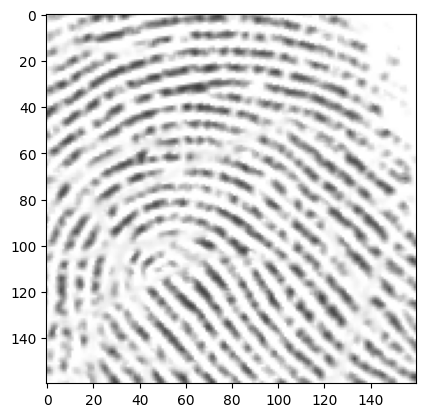

In [21]:
#Testing
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array

folder = '/content/gdrive/MyDrive/AI_Testing/Test_data'
for file in listdir(folder):
  photo = load_img(folder + '/' +  file)
  plt.imshow(photo)
  photo = load_img(folder + '/' +  file, target_size = (160, 160))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  
  class_name=[' ',
              
              '''
              Bạn thuộc chủng Ulnar Loop: 
                 + Bạn sở hữu tính cách nhẹ nhàng nhưng cũng cởi mở. 
                 + Bạn thích sự lãng mạn, tự do và luôn biết cách hòa hoãn để tránh xảy ra các mâu thuẫn không đáng có. 
                 + Đặc biệt bạn biết lắng nghe và luôn đón nhận những ý kiến từ mọi người để hoàn thiện bản thân
              ''', 
              
              '''
              Bạn thuộc chủng Radial Loop: 
                + Bạn có khả năng học hỏi, quan sát và thích nghi nhanh chóng. 
                + Bạn có khả năng sáng tạo cao, kết hợp với tính cách mạnh mẽ cá tính của bản thân 
                khiến công việc của bạn luôn đạt kết quả tốt. 
                + Đôi khi cách quản lý khác biệt của bạn khiến mọi người nhìn vào đánh giá bạn khá lập dị, nổi loạn. 
                + Bạn có thể khiến người khác “ngã ngửa” trong phát ngôn của bản thân. 
                + Vì quyền lợi của bản thân mà họ sẵn sàng đấu tranh, dám nghĩ và dám hành động. 
                + Bạn cực kỳ hứng thú với những điều huyền bí và thích khám phá mọi thứ xung quanh, những thứ mà bạn chưa biết
              ''', 

              '''
              Bạn thuộc chủng Arch: 
                + Bạn là những người có trách nhiệm với công việc, luôn tuân thủ và làm đúng những quy định, phép tắc được đặt ra.
                + Bạn có sự quyết tâm và luôn kiên trì theo đuổi những mục tiêu mà bản thân đã đặt ra. 
                + Bạn luôn chân thành với bạn bè và mọi người nên nhận lại được sự quý mến và tôn trọng từ mọi người. 
                + Bạn không thích những thứ mơ hồ hay tư duy trừu tượng. 
                + Đặc biệt bạn sống thực thế và luôn đòi hỏi mọi thứ, mọi việc có bằng chứng rõ ràng. 
                + Bạn là người kín đáo nên biết cách giữ bí mật, một người đáng tin cậy để mọi người xung quanh chia sẻ những điều thầm kín. 
                + Bạn có ý kiến kiên định và thích làm việc theo những cách thức đơn giản nhất. 
                + Bạn sống khá đơn giản, nhưng vẫn luôn tinh tế. 

              ''',
              
              '''
              Bạn thuộc chủng Whorl D: 
                + Bạn là những người thân thiện, sống tình cảm và luôn thích tâm sự, chia sẻ với mọi người. 
                + Bạn cũng thích được mọi người yêu thương và trân trọng mình. 
                + Bạn sẵn sàng thay đổi để thích nghi với môi trường mới, 
                trong công việc họ luôn tôn trọng ý kiến của người khác đề ra. 
                + Bạn cũng là những người có khả năng giao tiếp tốt, giỏi thương lượng 
                và sử dụng ngôn từ khéo léo nhằm giải quyết vấn đề nhanh chóng, hiệu quả.

              ''', 
              
              '''
              Bạn thuộc chủng Whorl E: 
                + Bạn là người quyết đoán trong công việc, quyết định của bản thân 
                không bị ảnh hưởng nhiều bởi các yếu tố bên ngoài. 
                + Bạn có ý chí kiên cường và khi đã xác định mục tiêu luôn quyết tâm cao độ để hoàn thành nó. 
                + Trong công việc, họ là những người thích hoạch định kế hoạch, chiến lược rõ ràng và khoa học 
                để giúp mọi việc diễn ra đúng mong muốn.
              ''',

              '''
              Bạn thuộc chủng Whorl S: 
                + Sống bằng lý trí, luôn kiên định như sức mạnh đại bàng. 
                + Bạn có tinh thần sẵn sàng chiến đấu với mọi kẻ thù và dám đương đầu với mọi thử thách. 
                + Trong công việc họ để cao sự nghiêm túc, không chịu khuất phục và thất bại quá dễ dàng. 
                + Bạn hiếu chiến nên luôn muốn dùng mọi cách để giành chiến thắng, đạt mục tiêu và sự thành công cho bản thân.

              ''']
  print(class_name[result])
  plt.show()